In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import pandas as pd
import lxml
import numpy as np
import matplotlib.pyplot as plt
import re
from itertools import cycle
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
from ggplot import *

# Exercise 1

In [2]:
data = pd.read_csv("gap.tsv", sep='\t')

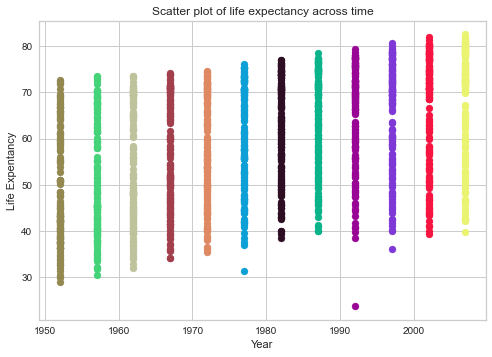

In [3]:
# storing colors for different years
colors = np.random.rand(len(data['year'].unique()),3)
life_expentency = data.groupby('year')['lifeExp'].apply(list).reset_index(name='lifeExp')

year_color = {}
year_life_exp = {}
i = 0

for x in data['year'].unique():
    year_color[x] = colors[i] 
    i+=1

# plotting the scatter points
for index, i in enumerate(life_expentency['year']):
    for j in life_expentency['lifeExp'][index]:
        plt.scatter(i, j, color= colors[index])

plt.xlabel("Year")
plt.ylabel('Life Expentancy')
plt.title("Scatter plot of life expectancy across time")
plt.show()

# Question 1
The general trend of life expentency is increasing with time. This trend line is very close to a linear. The trend line would have a positive slope.

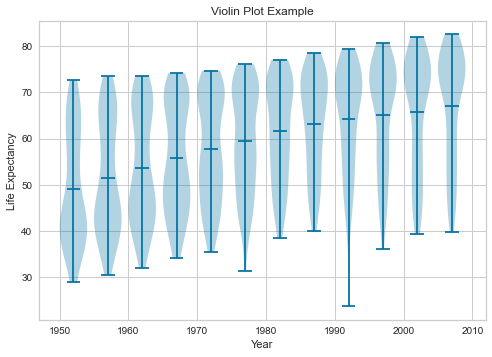

In [4]:
# violin plot of the lifeExp vs year
plt.violinplot(life_expentency['lifeExp'],life_expentency['year'],widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot Example")
plt.savefig("violin.png")

# Question 2
Year<br>
1952: Skewed, unimodel and not symmetric around its center <br>
1957: Skewed, not unimodel and not symmetric around its center<br>
1962: Skewed, not unimodel and symmetric around its center<br>
1967: Skewed, not unimodel and symmetric around its center<br>
1972: Skewed, not unimodel and symmetric around its center<br>
1977: Skewed, not unimodel and not symmetric around its center<br>
1982: Skewed, unimodel and not symmetric around its center<br>
1987: Skewed, unimodel and not symmetric around its center<br>
1992: Skewed, unimodel and not symmetric around its center<br>
1997: Skewed, unimodel and not symmetric around its center<br>
2002: Skewed, unimodel and not symmetric around its center<br>
2007: Skewed, unimodel and not symmetric around its center<br>


# Question 3
 
 Yes, I would reject the hypothesis of no relationship since it can be clearly seen through the violin plot that over the years, the life expentency keeps on increasing. Especially since this a large sample of data it is unlikely that the null hypothesis would hold true hence I will intuitively reject it.

# Question 4
I would expect the relation between the residuals vs year would also be close to linear relationship because the probability aren't affected as the residuals are just transformation of life expectancy.

# Question 5
The violin plot should be unimodel since there would be higher probability of the points closer to the linear regression line. The plot would also be symmetric about the regression line since there is linear relationship expected the lifeExp and the year.

# Exercise 2

In [5]:
y = np.array(data['lifeExp']).reshape(-1, 1)
x = np.array(data['year']).reshape(-1, 1)

# Linear regression on the
regr = LinearRegression()
# for calculation of the p value
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = regr.fit(x,y)
# storing the intercept and coefficent of the equation
intercept = regr.intercept_
coeff = regr.coef_

# printing the necessary information
print("Y = %f X + %f " %(regr.coef_, regr.intercept_))
print("P Value:" ,est.fit().f_pvalue)
print("Where \nX is Year")
print("Y is Life Expectancy")

Y = 0.325904 X + -585.652187 
P Value: 7.546794625594231e-80
Where 
X is Year
Y is Life Expectancy


# Question 6
 On average life expectancy increase every year around the world by 0.325904.

# Question 7
I reject the null hypothesis since the p value is 7.546794625594231e-80 which is very small. The p value helps represent the probability that I would have observed if I had excepted the null hypothesis i.e there is no relation between the life expentency and year.

# Exercise 3

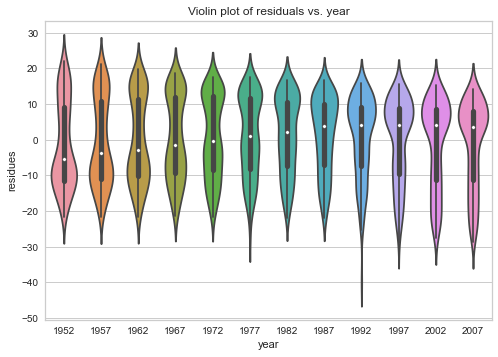

In [6]:
# calculating and storing the residue
data['residues'] = data['lifeExp'] - (intercept[0] + coeff[0,0]*data['year'] )

# Violin plot of the redisfuals vs year
sns.violinplot(x = 'year', y = 'residues', data = data, bw =.3 )
plt.title("Violin plot of residuals vs. year")
plt.show()

# Question 8
Yes, the violin plot from exercise 3 matches my expectation since the probability of life expentancy vs year wouldn't change despite the transformation.

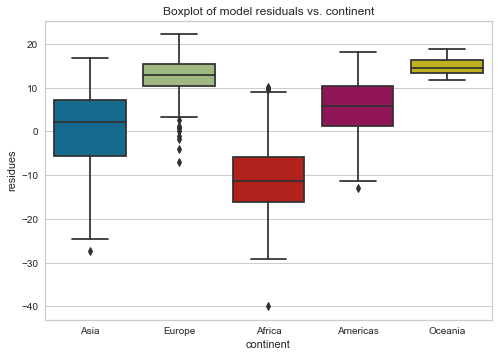

In [7]:
# boxplot of model residual vs continent
sns.boxplot(y = 'residues', x = 'continent', data = data)
plt.title("Boxplot of model residuals vs. continent")
plt.show()

# Question 9
There is a relation between the residues and the continent. To further understand the relation we should divide the data based of continents to get a better understanding of the reation. On conducting such an anaylsis one can determine which continent has the highest and lowest life expectancy. It also helps answer which continent is have a decreasing life expectancy and by how much.

# Exercise 5

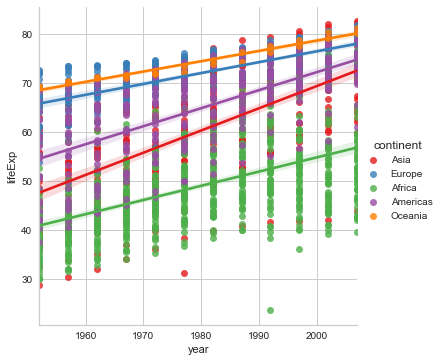

In [8]:
# plot of the linear regression for each continent
p = sns.lmplot(x="year", y="lifeExp", hue="continent", data=data, palette="Set1")

# Question 10
An interaction term needs to be added since the slope of the linear regression graph varies for different continent.

# Exercise 6

Coefficients:  0.32590382763715225
Mean squared error: 21.26
Variance score: 0.60


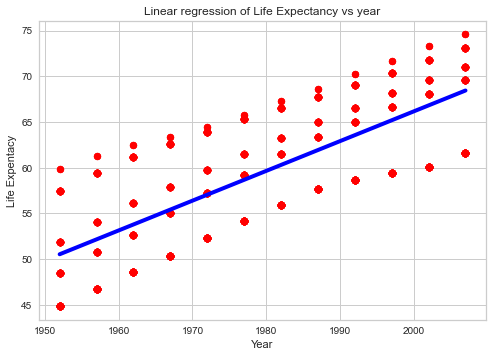

In [9]:
cont = []
ye = []
mean_cont = []


# calculating the mean of the life expetancy for each year of each continent
for c in data['continent'].unique():

    for year in data['year'].unique():
        mean = data.loc[ (data['continent'] == c ) & (data['year'] == year )].lifeExp.mean(axis =0)
        mean_cont.append(mean)
        cont.append(c)
        ye.append(year)

# storing the mean lifeExp of each year  for each continent
data_mean = pd.DataFrame(data = {'continent': cont, 'year':ye, 'mean': mean_cont})
interm_term = []

# calculating the interm term
for index, row in data.iterrows():
    
    m = data_mean.loc[ (data_mean['year'] == row['year']) & (data_mean['continent'] == row['continent'])]['mean']
  
    y = 0.5 * (intercept[0] + coeff[0,0]*row['year']) + (0.5 * float(m))
    interm_term.append(y)

# storing the interm term for each lifeExp
data['cont_interact'] = interm_term

data_x = np.array(data['year']).reshape(-1,1) 

data_y = np.array(data['cont_interact']).reshape(-1,1)

# Linear Regression
regr2 = LinearRegression()


regr2.fit(data_x, data_y)

# storing the coefficent, varience, mean square an intercept of the linear regression
co_eff = regr2.coef_
variance =  regr2.score(data_x, data_y)
mean_sq_err2 = np.mean((regr2.predict(data_x) - data_y) ** 2)
intercept = regr2.intercept_

print('Coefficients: ', regr2.coef_[0][0])
print("Mean squared error: %.2f"
      % np.mean((regr2.predict(data_x) - data_y) ** 2))
print('Variance score: %.2f' % regr2.score(data_x, data_y))

# plot of mean continent lifeExp for each year
plt.scatter(data_x, data_y,  color='red')
plt.plot(data_x, regr2.predict(data_x), color='blue',
         linewidth=4)

plt.title("Linear regression of Life Expectancy vs year")
plt.xlabel('Year')
plt.ylabel('Life Expentacy')
plt.show()    



# Question 11
All the parameter are significantly close to zero.

# Question 12
Asia : 0.4531224<br>
Europe : 0.22193214<br>
Africa : 0.28952926<br>
Americas : 0.36765094<br>
Oceania : 0.21027238

In [10]:
# LifeExp growth for each continent
for c in data.continent.unique():
      plotting = data[data["continent"] == c]
      regress = LinearRegression()
      regress.fit(np.array(plotting['year']).reshape(-1, 1), np.array(plotting['lifeExp']).reshape(-1, 1))
      print(c)
      print(regress.coef_)

Asia
[[0.4531224]]
Europe
[[0.22193214]]
Africa
[[0.28952926]]
Americas
[[0.36765094]]
Oceania
[[0.21027238]]


# Exercise 7
The residuals are zero-centered so they match the assumption of linear regression model well.

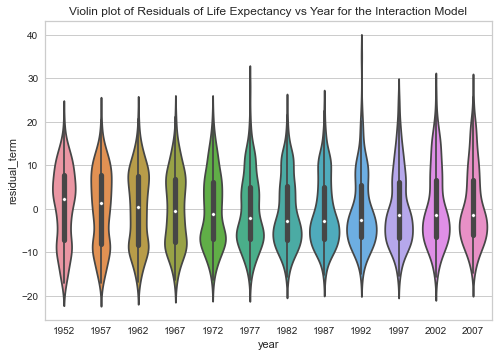

In [11]:
# Violin plot of Residuals of Life Expectancy vs Year for the Interaction Model
data['residual_term'] = data['cont_interact'] - data['lifeExp']
sns.violinplot(x = 'year', y = 'residual_term', data = data, bw =.3 )
plt.title("Violin plot of Residuals of Life Expectancy vs Year for the Interaction Model")
plt.show()